[ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 25. 30. 35. 40. 45. 50. 60.] [943. 831. 743. 668. 612. 531. 481. 437. 400. 356. 287. 225. 181. 150.
 131. 116.  85.]
17
m = 1009.9328516537258 +- 39.15201302474705 V
n = 39.74765863428993 +- 2.630532343416497 ms
Chi2       = 2.254182321675043
dof        = 15
Chi2_red   = 0.15027882144500287


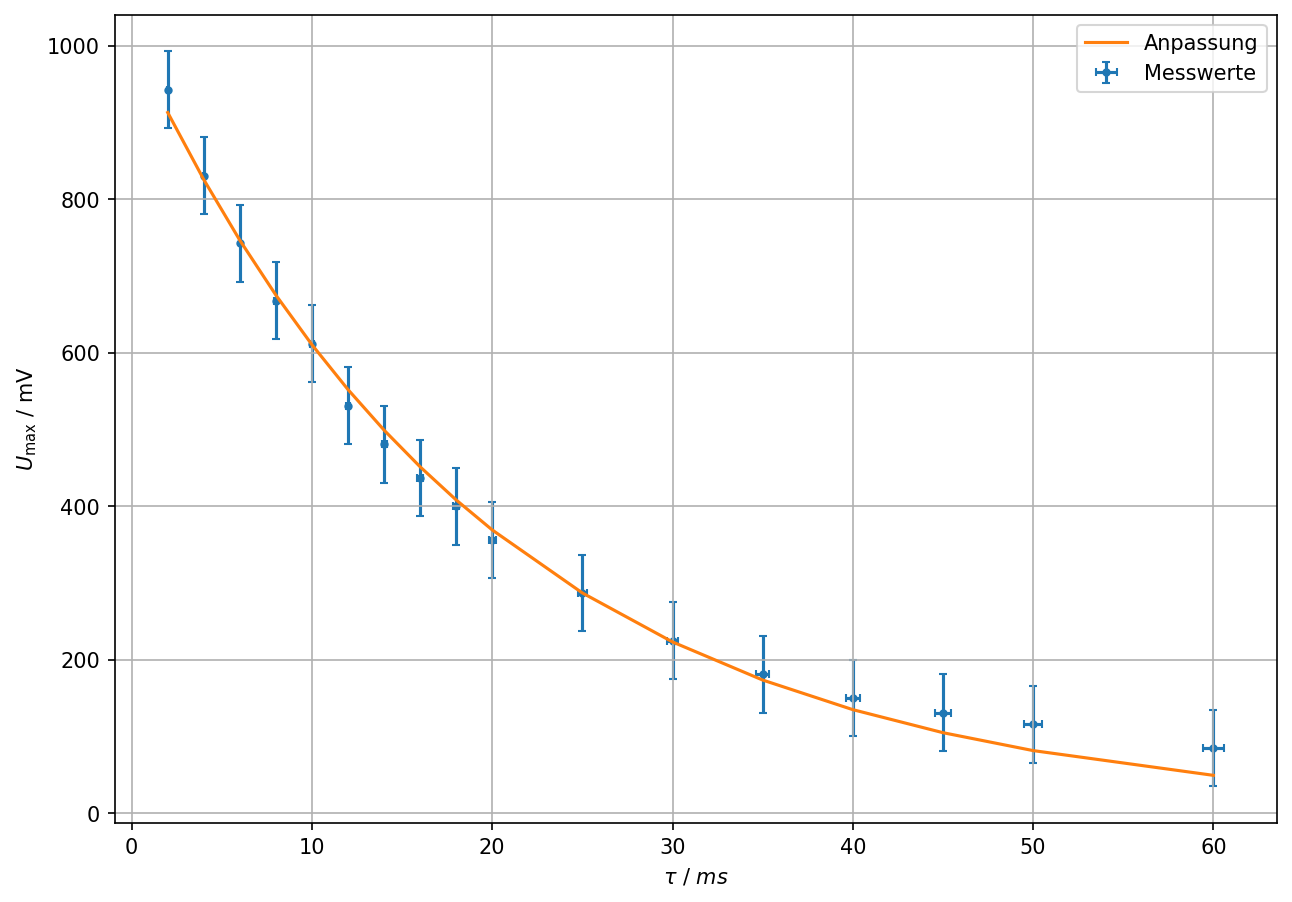

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.optimize import curve_fit


figure(figsize=(10,7), dpi=150)

tau=np.loadtxt('../data/hahn_echo.txt',skiprows=1,usecols=0)
U=np.loadtxt('../data/hahn_echo.txt',skiprows=1, usecols=1)
print(tau, U)
dtau=0.01*abs(tau)
#dU=0.02*abs(U)
#dtau = [0.1]*len(tau)
dU = [50]*len(U)
print(len(tau))
#tauk=tau
#Uk=U

#dtauk=[0.1]*len(tauk)
#dUk=[50]*len(Uk)
#dtauk=0.01*tauk
#dUk=0.02*Uk

def f(x,m,n):
    return m*(np.exp(-2*x/n))

guess=[max(U),20.0]

popt, pcov=curve_fit(f,tau,U,p0=guess,sigma=dU,absolute_sigma=True)
perr=np.sqrt(np.diag(pcov))

print("m =", popt[0], "+-", perr[0], "V")
print("n =", popt[1], "+-", perr[1], "ms")
#print('a =', popt[2], "+-", perr[2])
# compute chi-square
chi2 = np.sum(((U - f(tau, *popt)) / dU)**2)

# degrees of freedom = number of data points - number of parameters
dof = len(tau) - len(popt)

chi2_red = chi2 / dof

print("Chi2       =", chi2)
print("dof        =", dof)
print("Chi2_red   =", chi2_red)
#plt.xlim(-0.02, 0.04)
plt.grid(which='minor')
plt.grid(which='major')
plt.xlabel(r'$\tau$ / $ms$')
plt.ylabel(r'$U_{\mathrm{max}}$ / mV')
plt.tight_layout
plt.errorbar(tau, U,xerr=dtau, yerr=dU, fmt='.',capsize=2,  label='Messwerte', zorder=1)
plt.plot(tau,f(tau,*popt),  label='Anpassung', zorder=2)
plt.legend()
plt.savefig('../plots/hahn_echo.pdf')
plt.show()
#plt.plot(tauk,f(tauk,18,0.0038))


In [7]:
# dataframe
df = pd.DataFrame({
    r'$\tau$':tau,
    r'$d\tau$':dtau,
    r'$U$ / mV':U,
    r'$dU$ / mV':dU
})
print(df.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
$\tau$ & $d\tau$ & $U$ / mV & $dU$ / mV \\
\midrule
2.000000 & 0.020000 & 943.000000 & 50 \\
4.000000 & 0.040000 & 831.000000 & 50 \\
6.000000 & 0.060000 & 743.000000 & 50 \\
8.000000 & 0.080000 & 668.000000 & 50 \\
10.000000 & 0.100000 & 612.000000 & 50 \\
12.000000 & 0.120000 & 531.000000 & 50 \\
14.000000 & 0.140000 & 481.000000 & 50 \\
16.000000 & 0.160000 & 437.000000 & 50 \\
18.000000 & 0.180000 & 400.000000 & 50 \\
20.000000 & 0.200000 & 356.000000 & 50 \\
25.000000 & 0.250000 & 287.000000 & 50 \\
30.000000 & 0.300000 & 225.000000 & 50 \\
35.000000 & 0.350000 & 181.000000 & 50 \\
40.000000 & 0.400000 & 150.000000 & 50 \\
45.000000 & 0.450000 & 131.000000 & 50 \\
50.000000 & 0.500000 & 116.000000 & 50 \\
60.000000 & 0.600000 & 85.000000 & 50 \\
\bottomrule
\end{tabular}

